In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime
import numpy as np

In [2]:
# Define which online source one should use
data_source = 'yahoo'
start_date = '2010-01-01'
end_date = '2011-12-31'

In [3]:
# Define the instruments to download. We would like to see Apple, Microsoft
tickers_IND1 = ['MMM','AXP','AAPL','BA','CAT','CVX','CSCO','KO','DWDP','XOM','GE','GS','HD','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PFE','PG','TRV','UTX','UNH','VZ','V','WMT','DIS']

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data_IND1 = data.DataReader(tickers_IND1, data_source, start_date, end_date)

In [4]:
#tickers_IND2 = ['BAC','GE','AMD','MU','INTC','AAPL','ORCL','MSFT','CHK','T','CTL','CMCSA','F','FOXA','FCX','CSCO','C','MRO','FB','AES','HBAN','WFC','PFE','AMAT','JPM','CVS','NVDA','GM','RF','WMT','VZ','DIS','KEY','CSX','MRK','HPE','M','KMI','HPQ','SLB']

#panel_data_IND2= data.DataReader(tickers_IND2, data_source, start_date, end_date)

In [5]:
print panel_data_IND1
#print panel_data_IND2

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 505 (major_axis) x 30 (minor_axis)
Items axis: Adj Close to Volume
Major_axis axis: 2011-12-30 00:00:00 to 2009-12-31 00:00:00
Minor_axis axis: AAPL to XOM


In [180]:
panel_data_IND1[0,0,0]

51.865078000000004

In [6]:
def fconv(panel_data):
    del panel_data['Open']
    del panel_data['Close']
    del panel_data['High']
    del panel_data['Low']

    panel_data = panel_data[:,::-1,:]
fconv(panel_data_IND1)
#fconv(panel_data_IND2)

In [7]:
numberOfDays = len(panel_data_IND1.axes[1]) -1 
print "days: " + str(numberOfDays)
n_IND1 = len(tickers_IND1)
print "companies in dow30: " + str(n_IND1)
#n_IND2 = len(tickers_IND2)
#print "companies in dow30: " + str(n_IND2)

days: 504
companies in dow30: 30


In [8]:
c=0
l=[]
for i in range(2):
    for j in range(numberOfDays + 1):
        for k in range(len(tickers_IND1)):
            
            if (math.isnan(panel_data_IND1[i,j,k])):
                if(l.count(tickers_IND1[k]) == 0):
                    l.append(tickers_IND1[k])
                c+=1
print c, l

0 []


In [9]:
def flogprof(panel_data, numberOfDays, n):
    logProf = [[round(math.log(panel_data[0,i,j] / panel_data[0,i-1,j]), 4) for i in range(1,numberOfDays + 1)] for j in range(n)] 
    return logProf
    
logProf_IND1 = flogprof(panel_data=panel_data_IND1, numberOfDays=numberOfDays,n=n_IND1)
#logProf_IND2 = flogprof(panel_data=panel_data_IND2, numberOfDays=numberOfDays,n=n_IND2)

In [28]:
print len(logProf_IND1)
print len(logProf_IND1[0])

30
504


In [34]:
a = np.array(logProf_IND1)
logprofT = a.transpose() 
print len(logprofT)
print len(logprofT[0])

504
30


In [ ]:
pr =  [[round(panel_data_IND1[0,i,j], 4) for i in range(numberOfDays)] for j in range(n)]

In [162]:
print len(pr)

30


In [165]:
a = np.asarray(pr)
prT = a.transpose()

In [166]:
import scipy
from scipy.optimize import minimize, rosen, rosen_der

In [167]:
def ind(matrix, a, b):
    Y = []
    for day in matrix:
        sum = 0
        for i,elem in enumerate(day):
            sum += a[i] + b[i]*elem
        Y.append(sum)
    return Y

In [168]:
def R(X, matrix):
    n = len(matrix[0])
    a = X[0:n]
    b = X[n:]
    Y = ind(matrix, a, b)
    r = 0
    for i,day in enumerate(matrix):
        for elem in day:
            r += (elem - Y[i])**2
    return r

In [169]:
# решение задачи минимизации 
def minR(matrix):
    X0 = np.zeros(len(matrix[0])*2)
    res = scipy.optimize.minimize(fun=R, x0=X0, args=matrix)
    return res

In [170]:
result =minR(prT)

In [171]:
X = result.x
print X

[ 0.00340844  0.00340844  0.00340844  0.00340844  0.00340844  0.00340844
  0.00340844  0.00340844  0.00340844  0.00340844  0.00340844  0.00340844
  0.00340844  0.00340844  0.00340844  0.00340844  0.00340844  0.00340844
  0.00340844  0.00340844  0.00340844  0.00340844  0.00340844  0.00340844
  0.00340844  0.00340844  0.00340844  0.00340844  0.00340844  0.00340844
  0.0329744   0.03330342  0.03320327  0.03371612  0.03473687  0.03295383
  0.03321912  0.03410113  0.03597942  0.03321172  0.03258317  0.03303705
  0.03442352  0.03311272  0.03301533  0.03317097  0.03359814  0.03234693
  0.03289055  0.03265585  0.03477091  0.03615034  0.03308714  0.03314205
  0.03355226  0.03351335  0.03372632  0.03449302  0.03157979  0.03308297]


In [177]:
n = len(prT[0])
Y = ind(prT, X[:n], X[n:])
print len(Y)

504


In [ ]:
#поведение индекса рынка

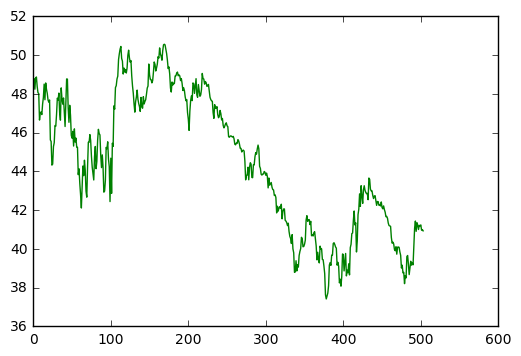

In [178]:
plt.plot(range(numberOfDays), Y, '-g')
plt.show()

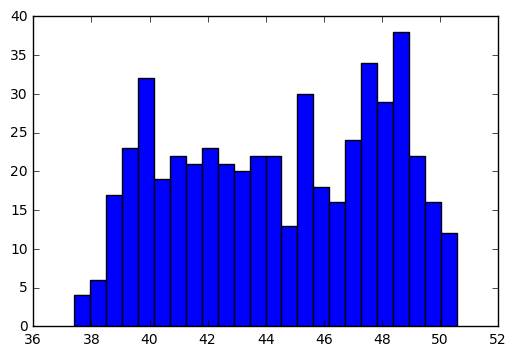

In [179]:
plt.hist(Y,24)
plt.show()

In [181]:
# добаим безрисковый актив

expandedprT = [day + [50 + 0.05*i] for i, day in enumerate(prT.tolist())]

In [185]:
result =minR(expandedprT)

In [186]:
X = result.x
print X

[ 0.00248078  0.00248078  0.00248078  0.00248078  0.00248078  0.00248078
  0.00248078  0.00248078  0.00248078  0.00248078  0.00248078  0.00248078
  0.00248078  0.00248078  0.00248078  0.00248078  0.00248078  0.00248078
  0.00248078  0.00248078  0.00248078  0.00248078  0.00248078  0.00248078
  0.00248078  0.00248078  0.00248078  0.00248078  0.00248078  0.00248078
  0.00248078  0.03224706  0.03232801  0.03218837  0.03186789  0.0329129
  0.03218776  0.0319106   0.03286947  0.03065293  0.03218747  0.03252511
  0.03219607  0.03112821  0.0321816   0.03272837  0.03173774  0.03252172
  0.03227722  0.03250227  0.0326743   0.03172166  0.03081769  0.03149645
  0.03265008  0.03229264  0.03287767  0.03170392  0.03220836  0.03246367
  0.03268777  0.03135282]


In [188]:
n = len(prT[0])
Y = ind(prT, X[:n], X[n:])
print len(Y)

504


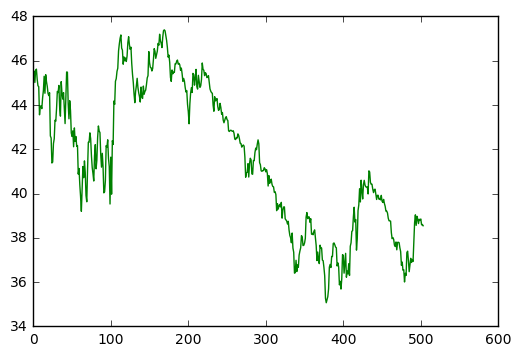

In [189]:
plt.plot(range(numberOfDays), Y, '-g')
plt.show()

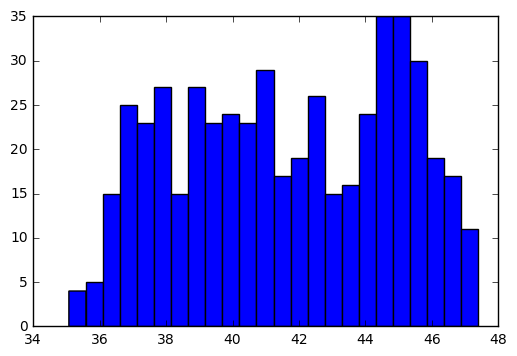

In [190]:
plt.hist(Y,24)
plt.show()